# Statistics basics
## Final project
Good news! You are hired by some retail company to analyse transaction statistics in a retail chain. (Sorry, this is just an imaginary company so far, but if you successfully finish our program, I'm sure it will become reality.)

You have to use everything that we learned so far to answer questions that are asked by your employer.

Part of the questions require that you write some code that will be automatically tested with autograding. So when you are finished, please, send this work to automatic grading.

The other part of questions are presented in the appropriate quiz. Answer them using your results.

Finally, some problems will be assessed manually. So, please, submit your notebook to staff graded assignment as well.

Note you are not allowed to use loops anywhere in this project!

Let's begin!

### Data

There are three datasets: `customers.csv`, `purchases.csv` and `shops.csv`. They are stored in `data` folder.

`customers.csv` contains information about each customer registered in loyalty program.

`shops.csv` contains information about shops and special offers they organized. One shap can organize several offers and therefore there are usually several rows that correspond to the same shops. However, some shops do not organize special offers at all, but they are presented in this table nevertheless.

`purchases.csv` is a purchase log. It contains information for all customers, either registered in a loyalty program (in this case we know the corresponding customer id) or not registered. One purchase can be a collection of several items, but we see only the total price of everything bought.

In [41]:
!ls data/

customers.csv  purchases.csv  shops.csv


First, let us load these datasets and make a quick glance on them.

### Problem 1 (autograded)
Load datasets intro variables `customers`, `purchases` and `shops`. Use `pd.read_csv`.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [43]:
# your code here
customers = pd.read_csv("data/customers.csv", encoding = "utf-8")
purchases = pd.read_csv("data/purchases.csv", encoding = "utf-8")
shops = pd.read_csv("data/shops.csv", encoding = "utf-8")

In [44]:
from hashlib import md5
import numpy as np


def test_df(frame, digest):
    obtained = md5(
        "".join(
            [str(x) for x in np.c_[frame.head().values, frame.tail().values]]
        ).encode("utf8")
    ).hexdigest()
    assert obtained == digest, "Something wrong with files: " + obtained


test_df(customers, "a8c3a3d5d5f93d721f7f98564228a484")
test_df(purchases, "1d4ffa7e30dcd29ab1d47d3731967a49")
test_df(shops, "e017f3f83ad39610a7d82a54480fb98f")
print("Great, everything loaded successfully!")

Great, everything loaded successfully!


### Problem 2 (quiz)

Investigate dataframes and answer the following questions (in the appropriate Quiz):

1. What is the type of variable `customer_id` in the dataset `purchases`?
2. What is the type of variable `age` in the dataset `customers`?

Note that you have to provide your answers based on the meaning of the data, not on the Python object types of the corresponding column.

### Problem 3 (SGA)
Let us consider column `total_price` in the dataset `purchases`. May we assume that this column is an i.i.d. sample from some random variable? Write your answer and full explanation in the cell below.


# SGA Submission Here for Problem 3

The total_price column in the dataset purchase can be assumed to be i.i.d. sample from some random variable.

Observations that support total_price being i.i.d. sample from some random variable:

1. No linearity or clustering of data points is discernable on the scatter plot for total_price over time (time represented as date_int, which is purchases.date cast as int). 

2. Correlation between total_price and time (represented as date_int, which is purchases.date cast as int) is very low (this supports finding of independence but is not in itself conclusive on independence).

3. Scatter plots of shop_id and customer_id - whether respectively against total_price, or with each other - show data points spread nearly homogeneously across each plot, indicating a lack of influence of the variables on each other.  Shop_id and customer_id are categorical, so linearity/correlation is not relevant in evaluating the scatter plots involving these variables.

4. On visual observation, the CDF plot for the total_price data matches well with the CDF plot of a normal distribution curve fitted on the data.  This provides an extent of support for the total_price sample having come from an underlying population that is normally distributed.

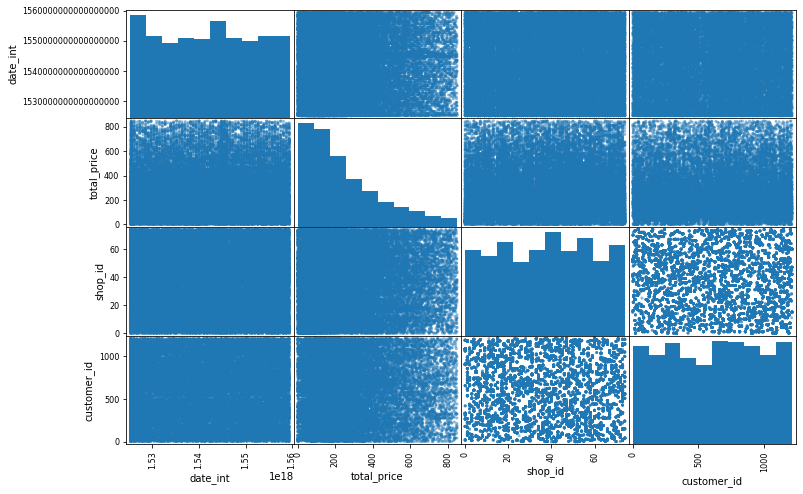

In [45]:
from pandas.plotting import scatter_matrix

def remove_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5  * iqr)
    upper_bound = q3 + (1.5 * iqr)
    out_df = df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return out_df

# preprocess purchases data for scatter plots by encoding dates to numeric, removing outliers
purchases['date_int'] = pd.to_datetime(purchases["date"]).astype(int)
purchases_no_out = remove_outlier(purchases, "total_price")

# plot scatter plots using scatter_matrix
attributes = ["date_int", "total_price", "shop_id", "customer_id"]
scatter_matrix(purchases_no_out[attributes], figsize=(12, 8))
plt.show()

In [46]:
# Correlation Matrix showing pair-wise correlation coeeficients
purchases_no_out.corr()


,customer_id,shop_id,total_price,date_int
customer_id,1.000000,-0.062201,0.009929,0.006648
shop_id,-0.062201,1.000000,0.021834,0.000279
total_price,0.009929,0.021834,1.000000,0.006071
date_int,0.006648,0.000279,0.006071,1.000000


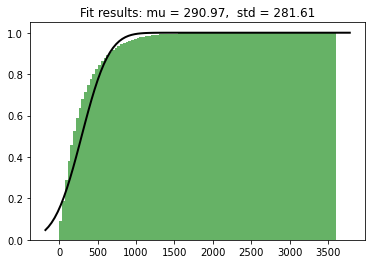

In [47]:
# comparing histogram of purchases data with fitted normal distribution's CDF.

import numpy as np
from scipy.stats import norm

data = purchases.total_price

# fit normal distribution to data, obtain mean mu and standard deviation std
mu, std = norm.fit(data)

# plot the histogram for the data
plt.hist(data, bins=100, cumulative=True, density=True, alpha=0.6, color='g')

# plot the CDF for Normal Distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
ncdf = norm.cdf(x, mu, std)
plt.plot(x, ncdf, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()


### Problem 4 (quiz)
Visualise distribution of variable `age` in the dataset `customers` using appropriate visualization tool.


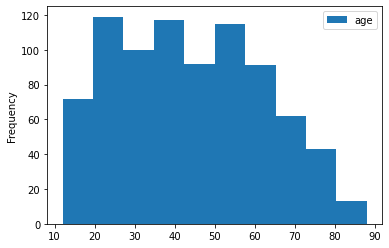

In [48]:
# your code here
customers.age.plot.hist(bins = 10, legend = True)

### Problem 5 (quiz)
Your employer is going to provide two special offers for all registered customers based on the customer age. They want to pick some threshold age, and offer one special program to customers who are younger than this threshold age and another special program to customers who are older than this age. They want to choose the threshold in such a way that the number of potential participants of both programs coincide (or at least be as close to each other as possible). What is the threshold?

In [49]:
# your code here

print("The threshold age is", customers.age.median())



The threshold age is 43.0


### Problem 6 (quiz)

Let us visualize how purchases are distributed around a year. For example, it is known that December is a hot month for retail due to Christmas. Will you see it in the data? Are there any other tendencies we will see?

To do it, we have to extract a month from the `date` variable of `purchases` table and create a new variable (new dataframe column) that contains this month, then plot distribution of this variable. There is a special data type in pandas to represent date and time. However, by default `pd.read_csv` does not try to guess that a particular column contains something that looks like a date and reads it just as a column of strings. So let's convert this column manually using function `pd.to_datetime` first:


In [50]:
purchases["date"] = pd.to_datetime(purchases["date"])

Let's check that `date` has correct `dtype`:

In [51]:
purchases["date"].dtype

dtype('<M8[ns]')

This should return something like `dtype('datetime64[ns]')` or `dtype('<M8[ns]')`. It is much easier to work with dates when they are converted to native datetime format instead of strings. For example, you can find the difference between two dates and do a lot of other things. To extract different features of date like month of even day of week, one can use `.dt` accessor (similar to using `.str` accessor to access string methods), see [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components) for details. For example, this is how we can extract day of week (Monday=0, Sunday=6):

In [52]:
purchases["date"].dt.dayofweek

0        4
1        5
2        6
3        5
4        5
        ..
40397    5
40398    5
40399    2
40400    5
40401    5
Name: date, Length: 40402, dtype: int64

Now let us return to our problem here. We want to make a plot that shows how many purchases we have per month. In other words, we want to create and consider new variable `month`. This is a categorical variable. Use an appropriate tool to visualize it.

Make this bar plot. 

**Hint.** To sort the values on the horizontal axis one can use `.sort_index()`.


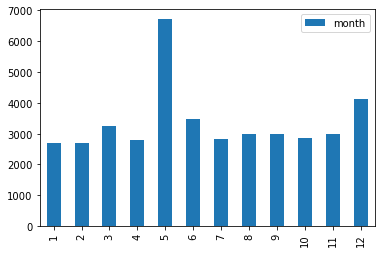

In [53]:
# your code here
# Note that this visualizes by month without consideration of year. 
purchases['month'] = purchases["date"].dt.month
purchases['month'].value_counts().sort_index().plot(kind='bar', legend = True)

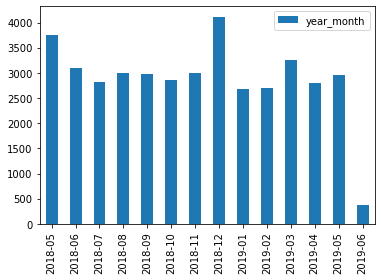

In [54]:
# Visualize count of purchases by year and month, not just by month
purchases['year_month'] = purchases["date"].dt.year.map(str) + '-' + purchases["date"].dt.month.map(lambda x: str(x).zfill(2))
purchases['year_month'].value_counts().sort_index().plot(kind='bar', legend = True)

In [55]:
# Count of days per year and month represented in data
purchases['day'] = purchases["date"].dt.day
purchases.groupby('year_month')['day'].nunique()

year_month
2018-05    26
2018-06    28
2018-07    28
2018-08    30
2018-09    29
2018-10    30
2018-11    28
2018-12    30
2019-01    28
2019-02    27
2019-03    29
2019-04    26
2019-05    29
2019-06     3
Name: day, dtype: int64

### Problem 7 (SGA)

What's wrong with May? Why do we have so many purchases? Are there any unknown holidays in this month? Or it's some other reason? Investigate your data and give an answer. Write it in the cell below. Add new cells to include code / explanations as necessary.

# SGA Submission Here for Problem 7


## 1: Explaining the Anomaly with May and Why December Was Not Peak Month in Initial Plotting.

Since the dataset's record dates is ranges from 3 May 2018 to 3 Jun 2019, data from day-month 3 May to 3 Jun where they exist could be from both 2018 and 2019, whereas for any other date in the dataset, they could only be from either 2018 or 2019, not both years.  This results in the volume for May to appear inflated. Indeed, if one were to subset the dataframe such that each day-month is exactly from one and only one year, one would find May would 

(1) not stand out as much (if the one year is taken from 3 May 2018 to 2 May 2019, for example); 

(2) would be overshadowed by Mar (if the one year is taken from 4 Jun 2018 to 3 Jun 2019, for example).  

Regardless, once the double counting is avoided, December is month with the highest volume.


## 2: Explaining Spikes in May

From the listing of dates in May in the top 100 volume days, we find that across the two years, there are 16 dates (16%) from May.  Looking through the 16 dates, I observe the following patterns around 15 of the 16 days:

(1) May days that are high volume days in both 2018 and 2019, namely, 4, 5, 11, 19, 26

(2) Days that are adjacent to high volume days, namely, 3 (adjacent to 4 and 5), 12 (adjacent to 11), 18 (adjacent to 19), 25 and 27 (adjacent to 26).

Referring to the calendars for 2018 and 2019, these "spikes" correspond to the weekends of May in those years, and the spike for the first weekend is particularly marked, which could be indicative of some "hidden" event or holiday.


## Other Observations: 

(1) Jun's data is not as inflated as only 3 days of Jun 2019 is represented in the dataset; 

(2) May 2018's figure could have more records had 1 May 2018 and 2 May 2018 been included as well; 

(3) not every day of a month would have purchase transactions - e.g. Jul 2018 has 31 calendar days, but only 28 of those days are represented in the records.


In [56]:
# Your code here

# Find min and max date of records in dataset
print("Min Date", purchases['date'].min())
print("Max Date", purchases['date'].max())


Min Date 2018-05-03 00:00:00
Max Date 2019-06-03 00:00:00


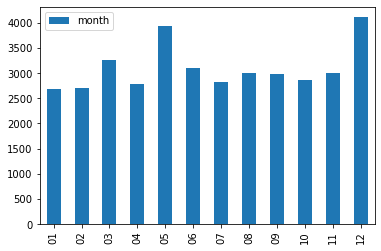

In [57]:
# Visualize count of purchases from 3 May 2018 to 2 May 2019 
# so that each day of the year is represented only once in the visualization
subset_1 = purchases[(purchases.date >= '2018-05-03') & (purchases.date <= '2019-05-02')]
subset_1['month'] = subset_1["date"].dt.month.map(lambda x: str(x).zfill(2))
subset_1['month'].value_counts().sort_index().plot(kind='bar', legend = True)

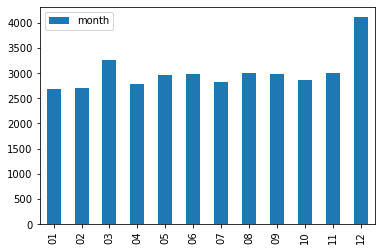

In [58]:
# Visualize count of purchases from 4 Jun 2018 to 3 Jun 2019 
# so that each day of the year is represented only once in the visualization
subset_2 = purchases[(purchases.date >= '2018-06-04') & (purchases.date <= '2019-06-03')]
subset_2['month'] = subset_2["date"].dt.month.map(lambda x: str(x).zfill(2))
subset_2['month'].value_counts().sort_index().plot(kind='bar', legend = True)

In [59]:
# Find dates in May that are in top n volume days.

n = 100
subset_3 = purchases['date'].value_counts().head(n).sort_values(ascending = False)

subset_3.reset_index()
subset_3[subset_3.index.month == 5].sort_index()

2018-05-03    489
2018-05-04    265
2018-05-05    707
2018-05-11    107
2018-05-12    277
2018-05-19    289
2018-05-26    253
2018-05-27    110
2019-05-04    301
2019-05-05    110
2019-05-11    262
2019-05-18    282
2019-05-19    107
2019-05-25    294
2019-05-26    129
2019-05-31    110
Name: date, dtype: int64

### Problem 8 (quiz)
We see that people go to shop more often in December. But do they spend more per each visit? Let us draw a bar plot that shows the average purchase total price per month of year. Use `groupby` with the `month` variable you (hopefully) created earlier.

month
1     277.223906
2     285.313262
3     285.896494
4     282.028119
5     275.364266
6     304.121282
7     290.560938
8     271.040666
9     302.298369
10    276.817209
11    262.964978
12    364.889056
Name: total_price, dtype: float64


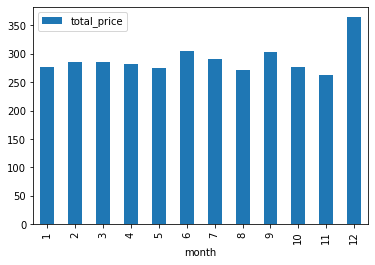

In [60]:
# your code here
print(purchases.total_price.groupby(purchases.month).mean())
purchases.total_price.groupby(purchases.month).mean().plot(kind='bar', legend = True)

### Problem 9 (quiz)
Okay, we see that there is a difference between December's mean purchase price and other month's. But we also see that the average price is different in different months (not including December), probably due to some random factors. Is it possible that December behaviour is just a result of fluke? To answer this question, let us compare two months, for example, December and November, in a statistically rigorous way.

To do so, let us find the average purchase price in each month in each shop (hint: use `.pivot_table`), then extract two samples: one contains average purchase prices in December and another in November. The number of elements in each sample should be equal to the number of shops. Is it true that they are different? Use the statistical test that suits this problem the best with a two-sided alternative. Then answer the question in a quiz.


In [61]:
# your code here
from scipy.stats import ttest_rel

pt = pd.pivot_table(purchases,index=["shop_id"],values=["total_price"],columns=["month"],aggfunc=[np.mean],fill_value=0, margins=False, dropna=False)
print(type(pt))

#pt.info()
purch_dec = pt.loc[:,("mean", "total_price", 12)]
purch_nov = pt.loc[:,("mean", "total_price", 11)]
purch_oct = pt.loc[:,("mean", "total_price", 10)]
purch_sep = pt.loc[:,("mean", "total_price", 9)]
purch_aug = pt.loc[:,("mean", "total_price", 8)]
purch_jul = pt.loc[:,("mean", "total_price", 7)]
purch_jun = pt.loc[:,("mean", "total_price", 6)]
purch_may = pt.loc[:,("mean", "total_price", 5)]
purch_apr = pt.loc[:,("mean", "total_price", 4)]
purch_mar = pt.loc[:,("mean", "total_price", 3)]
purch_feb = pt.loc[:,("mean", "total_price", 2)]
purch_jan = pt.loc[:,("mean", "total_price", 1)]

print(ttest_rel(purch_dec, purch_nov))
print(ttest_rel(purch_dec, purch_oct))
print(ttest_rel(purch_dec, purch_sep))
print(ttest_rel(purch_dec, purch_aug))
print(ttest_rel(purch_dec, purch_jul))
print(ttest_rel(purch_dec, purch_jun))
print(ttest_rel(purch_dec, purch_may))
print(ttest_rel(purch_dec, purch_apr))
print(ttest_rel(purch_dec, purch_mar))
print(ttest_rel(purch_dec, purch_feb))
print(ttest_rel(purch_dec, purch_jan))


<class 'pandas.core.frame.DataFrame'>
Ttest_relResult(statistic=12.130046456676508, pvalue=2.887511793692427e-19)
Ttest_relResult(statistic=10.74037368931907, pvalue=9.379136004778185e-17)
Ttest_relResult(statistic=6.990964879865786, pvalue=1.0218511170849876e-09)
Ttest_relResult(statistic=10.707089461631103, pvalue=1.079846853415441e-16)
Ttest_relResult(statistic=8.74956879615886, pvalue=4.945519037167865e-13)
Ttest_relResult(statistic=7.3671582090109515, pvalue=2.020535361137455e-10)
Ttest_relResult(statistic=13.73851461480646, pvalue=4.722396347871585e-22)
Ttest_relResult(statistic=9.481000716436052, pvalue=2.064836740371835e-14)
Ttest_relResult(statistic=8.895436994683472, pvalue=2.6211641110405097e-13)
Ttest_relResult(statistic=10.257920913752278, pvalue=7.301225319282586e-16)
Ttest_relResult(statistic=11.361255966314149, pvalue=6.903676174132021e-18)


### Problem 10 (autograded)

Now let us investigate customer behaviour. First of all we are interested in the relation between customers' age and their spendings per each purchase. To study this relation, first join tables `purchases` and `customers` in such a way to obtain information on customer's age for each purchase. Call the resulting table `purchases_c`. This table should contain all purchases by the registered customers, but rows that correspond to unregistered customers (not present in `customers`) should be dropped. The resulting table also should contain column `customer_id`.

In [62]:
# your code here

# purchases.info()
# customers.info()

purchases_regcust = purchases.dropna(subset=['customer_id'])

purchases_c = purchases_regcust.merge(customers, left_on='customer_id', right_on='customer id')
purchases_c.drop('customer id', axis=1, inplace=True)

# purchases_regcust.info()
# purchases_c.info()


In [63]:
assert (
    purchases_c[lambda x: x["customer_id"] == 123]["age"]
    == customers.set_index("customer id").loc[123]["age"]
).all()
assert (
    purchases_c[lambda x: x["customer_id"] == 12]["age"]
    == customers.set_index("customer id").loc[12]["age"]
).all()
assert sum(purchases_c["customer_id"]) == 17548008.0

### Problem 11 (autograded)

In [64]:
purchases_c

,customer_id,date,shop_id,total_price,date_int,month,year_month,day,age
0,0.0,2018-05-04,40,289.673291,1525392000000000000,5,2018-05,4,38.0
1,0.0,2019-01-26,40,1316.898901,1548460800000000000,1,2019-01,26,38.0
2,0.0,2018-11-18,42,159.414367,1542499200000000000,11,2018-11,18,38.0
3,0.0,2018-05-12,42,808.791649,1526083200000000000,5,2018-05,12,38.0
4,0.0,2019-04-20,42,1207.855038,1555718400000000000,4,2019-04,20,38.0
...,...,...,...,...,...,...,...,...,...
28794,1212.0,2018-11-08,60,46.653544,1541635200000000000,11,2018-11,8,24.0
28795,1212.0,2018-07-20,60,50.592132,1532044800000000000,7,2018-07,20,24.0
28796,1212.0,2019-04-18,15,95.459705,1555545600000000000,4,2019-04,18,24.0
28797,1212.0,2019-02-14,60,69.968788,1550102400000000000,2,2019-02,14,24.0


To visualize the relation between customer's age and their spendings, we have to transform our table in such a way that one observation (row) corresponds to one customer. Let us do it by groupping and aggregating. Transform table `purchases_c` to find average `total_price` for each customer and keep column `age`. Indexes of the new dataframe should be customer id's. Put the resulting dataframe to variable `purchases_c_mean`.


In [65]:
# your code here
purchases_c_mean = purchases_c.groupby(purchases_c.customer_id).agg(age=('age', max), total_price=('total_price', np.mean))

purchases_c_mean

,age,total_price
customer_id,,
0.0,38.0,711.291471
2.0,60.0,380.286822
3.0,NaN,392.825462
4.0,24.0,349.189551
5.0,24.0,472.189806
...,...,...
1206.0,57.0,251.489294
1207.0,42.0,525.552619
1208.0,31.0,640.826988


In [66]:
assert (
    purchases_c_mean.loc[12]["total_price"]
    == purchases_c.query("customer_id == 12")["total_price"].mean()
)
assert (
    purchases_c_mean.loc[125]["total_price"]
    == purchases_c.query("customer_id == 125")["total_price"].mean()
)

### Problem 12 (quiz)
Use dataframe `purchases_c_mean` to visualize the relation between customer's `age` (horizontal axis) and their average `total_price` (vertical axis).

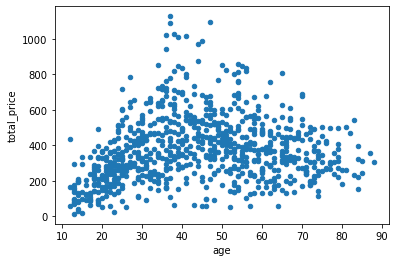

In [67]:
# your code here
purchases_c_mean.plot(x='age', y='total_price', kind='scatter')


### Problem 13 (quiz)
Find Pearson's correlation coefficient between age and total price.

In [68]:
# your code here
purchases_c_mean.corr(method='pearson')

,age,total_price
age,1.000000,0.165395
total_price,0.165395,1.000000


### Problem 14 (quiz)
We found correlation in the data present on the previous step and made some conclusions based on this data. However, we have to make sure that we can generalize our conclusion to the corresponding population. To do it, let us perform a statistical test of the significance of correlation. This can be done with `scipy.stats.pearsonr`. However, our data contains `NaN`'s in column `age` (there are registered customers with unknown age). Use method `.dropna()` to remove such rows from the dataset, then perform statistical testing with `pearsonr`. This function returns a two-tuple: first value is correlation coefficient and the second is p-value that corresponds to a test where the null hypothesis is that the correlation in population is zero.

In [69]:
# your code here
from scipy.stats import pearsonr
pearsonr(purchases_c_mean.dropna().age, purchases_c_mean.dropna().total_price)

(0.165395081207719, 1.811078910330637e-06)

### Problem 15 (autograded)
Now we are going to do the main investigation. We want to understand how special offers in our shops affect customers' behaviour. To do it, we have to identify those purchases that are made during special offers. This can be a bit tricky: for each purchase we know its date and shop id. For each shop we also know the dates of all special offers (there can be several). So for each purchase we have to compare its date with dates of all offers that took place in the corresponding shop.

As a first step, let us try to join `purchases_c` with `shops`. Name this table `full_df_preliminary`.

In [70]:
# your code here
purchases_c.info()
shops.info()
full_df_preliminary = purchases_c.merge(shops, left_on='shop_id', right_on='shop_id')
full_df_preliminary

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28799 entries, 0 to 28798
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  28799 non-null  float64       
 1   date         28799 non-null  datetime64[ns]
 2   shop_id      28799 non-null  int64         
 3   total_price  28799 non-null  float64       
 4   date_int     28799 non-null  int64         
 5   month        28799 non-null  int64         
 6   year_month   28799 non-null  object        
 7   day          28799 non-null  int64         
 8   age          27419 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 3.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   shop_id      183 non-null    int64 
 1   offer_begin  175 non-null    object
 2  

,customer_id,date,shop_id,total_price,date_int,month,year_month,day,age,offer_begin,offer_end
0,0.0,2018-05-04,40,289.673291,1525392000000000000,5,2018-05,4,38.0,2018-08-15,2018-09-10
1,0.0,2019-01-26,40,1316.898901,1548460800000000000,1,2019-01,26,38.0,2018-08-15,2018-09-10
2,0.0,2019-06-01,40,341.922336,1559347200000000000,6,2019-06,1,38.0,2018-08-15,2018-09-10
3,0.0,2018-12-22,40,936.012095,1545436800000000000,12,2018-12,22,38.0,2018-08-15,2018-09-10
4,0.0,2018-06-24,40,1005.693540,1529798400000000000,6,2018-06,24,38.0,2018-08-15,2018-09-10
...,...,...,...,...,...,...,...,...,...,...,...
69403,1199.0,2019-04-24,4,149.715169,1556064000000000000,4,2019-04,24,22.0,2018-08-28,2018-09-04
69404,1199.0,2018-10-17,4,209.615582,1539734400000000000,10,2018-10,17,22.0,2018-08-28,2018-09-28
69405,1199.0,2018-10-17,4,209.615582,1539734400000000000,10,2018-10,17,22.0,2018-08-28,2018-09-04
69406,1199.0,2019-05-11,4,666.640059,1557532800000000000,5,2019-05,11,22.0,2018-08-28,2018-09-28


In [71]:
assert (
    full_df_preliminary.query('date == "2019-04-24" and customer_id == 555.0')[
        "offer_begin"
    ].iloc[0]
    == "2018-08-15"
)
assert (
    full_df_preliminary.query('date == "2018-08-24" and customer_id == 686.0').max()[
        "offer_end"
    ]
    == "2019-01-21"
)

### Problem 16 (autograded)
Let us investigate the table `full_df_preliminary`. Each row of this table corresponds to some purchase. However, for some shops we have several special offers and therefore several rows in the table `shops`. During the join each purchase is joined to all rows of `shops` that correspond to a particular shop. Therefore, purchases are duplicated, and we lost information on which rows in `full_df_preliminary` correspond to which purchase. (For example, the last two rows seem to correspond to the same purchase, but can we be sure?) This is due to the fact that table `purchases_c` don't have any explicit column with purchase identifier. Let us add it. As each row of `purchases_c` corresponds to exactly one purchase, table index can work as such an identifier. To create a column that coincides with the index one can use method `.reset_index()`.

Apply `.reset_index()` to `purchases_c`, then repeat the join from the previous problem. Name the resulting dataframe `full_df`.

In [72]:
full_df = purchases_c.reset_index().merge(shops, on='shop_id').set_index('index')
full_df

,customer_id,date,shop_id,total_price,date_int,month,year_month,day,age,offer_begin,offer_end
index,,,,,,,,,,,
0,0.0,2018-05-04,40,289.673291,1525392000000000000,5,2018-05,4,38.0,2018-08-15,2018-09-10
1,0.0,2019-01-26,40,1316.898901,1548460800000000000,1,2019-01,26,38.0,2018-08-15,2018-09-10
7,0.0,2019-06-01,40,341.922336,1559347200000000000,6,2019-06,1,38.0,2018-08-15,2018-09-10
9,0.0,2018-12-22,40,936.012095,1545436800000000000,12,2018-12,22,38.0,2018-08-15,2018-09-10
10,0.0,2018-06-24,40,1005.693540,1529798400000000000,6,2018-06,24,38.0,2018-08-15,2018-09-10
...,...,...,...,...,...,...,...,...,...,...,...
28495,1199.0,2019-04-24,4,149.715169,1556064000000000000,4,2019-04,24,22.0,2018-08-28,2018-09-04
28496,1199.0,2018-10-17,4,209.615582,1539734400000000000,10,2018-10,17,22.0,2018-08-28,2018-09-28
28496,1199.0,2018-10-17,4,209.615582,1539734400000000000,10,2018-10,17,22.0,2018-08-28,2018-09-04


In [73]:
print(full_df.query("index == 1207"))
print(purchases_c.loc[1207][["customer_id", "date", "shop_id", "total_price"]])

       customer_id       date  shop_id  total_price             date_int  \
index                                                                      
1207          40.0 2019-01-20        7    211.85074  1547942400000000000   
1207          40.0 2019-01-20        7    211.85074  1547942400000000000   
1207          40.0 2019-01-20        7    211.85074  1547942400000000000   
1207          40.0 2019-01-20        7    211.85074  1547942400000000000   

       month year_month  day   age offer_begin   offer_end  
index                                                       
1207       1    2019-01   20  21.0  2019-05-31  2019-06-29  
1207       1    2019-01   20  21.0  2018-05-06  2018-05-13  
1207       1    2019-01   20  21.0  2019-05-14  2019-06-05  
1207       1    2019-01   20  21.0  2019-05-20  2019-06-04  
customer_id                     40
date           2019-01-20 00:00:00
shop_id                          7
total_price                211.851
Name: 1207, dtype: object


In [74]:
assert (
    full_df.query("index == 1207")
    .iloc[0][["customer_id", "date", "shop_id", "total_price"]]
    .equals(purchases_c.loc[1207][["customer_id", "date", "shop_id", "total_price"]])
)

### Problem 17 (autograded)
Now we need to check for each purchase, did it happen during any of the special offers or not. In the dataset `full_df`, each row relates some purchase with some special offer that happened in the same shop as a purchase. Let us check, is it true that this purchase happened during the corresponding offer? Add a column `offer` that contains values `True` or `False` that answer this question. To do so, we have to compare the value in column `date` with values in columns `offer_begin` and `offer_end`. Let us assume that `offer_end` is the last day of the offer (so the offer still holds during this day). Name the corresponding dataframe `full_df_offer`. Note that you can compare between dates, but not between dates and strings. Convert your data appropriately.


In [75]:
# your code here
def conditions(c):
    return True if c.date >= pd.to_datetime(c.offer_begin) and c.date <= pd.to_datetime(c.offer_end) else False

full_df_offer = full_df
full_df_offer['offer'] = full_df_offer.apply(conditions, axis=1)
full_df_offer.index.name = 'index'
full_df_offer


,customer_id,date,shop_id,total_price,date_int,month,year_month,day,age,offer_begin,offer_end,offer
index,,,,,,,,,,,,
0,0.0,2018-05-04,40,289.673291,1525392000000000000,5,2018-05,4,38.0,2018-08-15,2018-09-10,False
1,0.0,2019-01-26,40,1316.898901,1548460800000000000,1,2019-01,26,38.0,2018-08-15,2018-09-10,False
7,0.0,2019-06-01,40,341.922336,1559347200000000000,6,2019-06,1,38.0,2018-08-15,2018-09-10,False
9,0.0,2018-12-22,40,936.012095,1545436800000000000,12,2018-12,22,38.0,2018-08-15,2018-09-10,False
10,0.0,2018-06-24,40,1005.693540,1529798400000000000,6,2018-06,24,38.0,2018-08-15,2018-09-10,False
...,...,...,...,...,...,...,...,...,...,...,...,...
28495,1199.0,2019-04-24,4,149.715169,1556064000000000000,4,2019-04,24,22.0,2018-08-28,2018-09-04,False
28496,1199.0,2018-10-17,4,209.615582,1539734400000000000,10,2018-10,17,22.0,2018-08-28,2018-09-28,False
28496,1199.0,2018-10-17,4,209.615582,1539734400000000000,10,2018-10,17,22.0,2018-08-28,2018-09-04,False


In [76]:
from itertools import islice

for _, row in islice(full_df_offer.iterrows(), 0, 1000):
    assert (
        (pd.to_datetime(row["date"]) >= pd.to_datetime(row["offer_begin"]))
        & (pd.to_datetime(row["date"]) <= pd.to_datetime(row["offer_end"]))
    ) == row["offer"]

### Almost here
Now we have a table that contains information on whether a particular purchase happened during a particular special offer. What we need is a new table that contains information on whether a particular purchase happened during *any* relevant special offer. This can be done by grouping and aggregating. Basically, we need to group our table by column `index` that contains a purchase identifier and apply a special aggregation function `any` to column `offer`. This function checks if there is any `True` element in a group and returns `True` in this case, otherwise (everything is `False`) it returns false. Also, we have to keep all other columns that are related to purchases as is. They are duplicated in the group, so we can just get the first value. This is done by the aggregation function `first`. To apply these functions to different columns, we have to pass a dictionary to method `.agg`. Let's see what's happening.


In [77]:
purchases_offer = full_df_offer.groupby("index").agg(
    {
        "customer_id": "first",
        "date": "first",
        "shop_id": "first",
        "total_price": "first",
        "month": "first",
        "age": "first",
        "offer": "any",
    }
)

purchases_offer



,customer_id,date,shop_id,total_price,month,age,offer
index,,,,,,,
0,0.0,2018-05-04,40,289.673291,5,38.0,False
1,0.0,2019-01-26,40,1316.898901,1,38.0,False
2,0.0,2018-11-18,42,159.414367,11,38.0,False
3,0.0,2018-05-12,42,808.791649,5,38.0,False
4,0.0,2019-04-20,42,1207.855038,4,38.0,False
...,...,...,...,...,...,...,...
28794,1212.0,2018-11-08,60,46.653544,11,24.0,False
28795,1212.0,2018-07-20,60,50.592132,7,24.0,True
28796,1212.0,2019-04-18,15,95.459705,4,24.0,False


### Problem 18 (quiz)
Do people tend to spend more money when they make a purchase during a special offer? Let's check it!

First of all, we know that during December people spend more money in shops due to holidays and at the time shops usually announce more special offers during December. As we are interested in the effect of special offers alone, let us remove all purchases that happened during December.

Then create a table which rows are customers that contains two columns: in one column we have average of all prices of purchases that were made during special offers, and in the second the same for purchases that were not made during special offers. Drop all rows that contain `NaN`'s. Then apply an appropriate statistical test to check if there is any statistically significant difference between these columns. Use two-sided alternative.




In [78]:
# your code here

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

from scipy.stats import ttest_rel

purchases_no_dec = (purchases_offer[purchases_offer.month != 12]).dropna()

test_table = purchases_no_dec.pivot_table(index = ["customer_id"], 
                            values = ["total_price"], 
                            columns= ["offer"], 
                            # aggfunc = [np.mean, lambda x: x.count()], 
                            aggfunc = [np.mean], 
                            margins = False) 
test_table.columns = ["mean_price_True", "mean_price_False"]
# print(test_table)
test_table.dropna(inplace=True)
print(test_table)

print(ttest_rel(test_table.mean_price_False, test_table.mean_price_True))


             mean_price_True  mean_price_False
customer_id                                   
0.0               685.331168        901.935686
2.0               389.216152        318.049544
4.0               347.161530        325.092632
5.0               487.628759        279.079141
7.0               242.284635        252.828339
...                      ...               ...
1206.0            240.058252        245.374937
1207.0            413.785779        941.025534
1208.0            542.108836        683.695119
1210.0            265.196887        397.319089
1212.0            209.140997         89.963846

[701 rows x 2 columns]
Ttest_relResult(statistic=16.12777722935958, pvalue=5.418737612597614e-50)
